# indices of freedom and democracy for countries, and merging these indices with other metrics commonly associated with happiness and progression

# references

- [list of freedom indices](https://en.wikipedia.org/wiki/List_of_freedom_indices)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shijian
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 100)
sns.set(context = "paper", font = "monospace")
shijian.setup_Jupyter()

df = pd.read_csv("country_freedom_indices.csv", delimiter = ",")

In [2]:
df.query("Index_of_Economic_Freedom_2018 == 'free' and Index_of_Economic_Freedom_2018 == 'free' and Press_Freedom_Index_2018 == 'good situation' and Democracy_Index_2017 == 'full democracy'")

,country,Freedom_in_the_World_2018,Index_of_Economic_Freedom_2018,Press_Freedom_Index_2018,Democracy_Index_2017
83,Ireland,free,free,good situation,full democracy
131,New Zealand,free,free,good situation,full democracy
178,Switzerland,free,free,good situation,full democracy


Re-encode string values as numerical values.

In [3]:
df["Freedom_in_the_World_2018"].replace(
    {
        "free"                  : 3,
        "partly free"           : 2,
        "not free"              : 1
    },
    inplace = True
)
df["Index_of_Economic_Freedom_2018"].replace(
    {
        "free"                  : 5,
        "mostly free"           : 4,
        "moderately free"       : 3,
        "mostly unfree"         : 2,
        "repressed"             : 1 
    },
    inplace = True
)
df["Press_Freedom_Index_2018"].replace(
    {
        "good situation"        : 5,
        "satisfactory situation": 4,
        "noticeable problems"   : 3,
        "difficult situation"   : 2,
        "very serious situation": 1 
    },
    inplace = True
)
df["Democracy_Index_2017"].replace(
    {
        "full democracy"        : 4,
        "flawed democracy"      : 3,
        "hybrid regime"         : 2,
        "authoritarian regime"  : 1
    },
    inplace = True
)

In [4]:
ELGARIWI2016        = pd.read_csv("ILGA-RIWI_2016.csv", delimiter = ",")
PGAHR2014           = pd.read_csv("Pew_Global_Attitudes_Homosexuality_Report_2014.csv", delimiter = ",")
WHR2017             = pd.read_csv("World_Happiness_Report_2017.csv", delimiter = ",")
country_coordinates = pd.read_csv("country_coordinates.csv", delimiter = ",")
UNODC2014           = pd.read_csv("UNODC_murder_rates_2014.csv", delimiter = ",")
country_employment  = pd.read_csv("country_employment.csv", delimiter = ",")

# merge freedom and happiness, and generate a hierarchical cluster map

In [5]:
WHR2017.rename(columns = {"Country": "country"}          , inplace = True)
WHR2017.rename(columns = {"Overall Rank": "overall_rank"}, inplace = True)

In [6]:
freedom_and_happiness = pd.merge(df, WHR2017, on = "country", how = "inner")
df = freedom_and_happiness
df.head()

,country,Freedom_in_the_World_2018,Index_of_Economic_Freedom_2018,Press_Freedom_Index_2018,Democracy_Index_2017,overall_rank,Change in rank,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
0,Afghanistan,1.0,2.0,2.0,1.0,141,13.0,3.794,0.434,0.401,0.582,0.181,0.106,0.312,0.061,2.151
1,Albania,2.0,3.0,3.0,2.0,109,0.0,4.644,-0.011,0.996,0.804,0.731,0.381,0.201,0.040,1.490
2,Algeria,1.0,1.0,2.0,1.0,53,-15.0,5.872,-0.483,1.092,1.146,0.618,0.233,0.069,0.146,2.568
3,Angola,1.0,1.0,2.0,1.0,140,1.0,3.795,-0.071,0.858,1.104,0.050,0.000,0.098,0.070,1.614
4,Argentina,3.0,2.0,3.0,3.0,24,2.0,6.599,-0.051,1.185,1.440,0.695,0.495,0.109,0.060,2.614


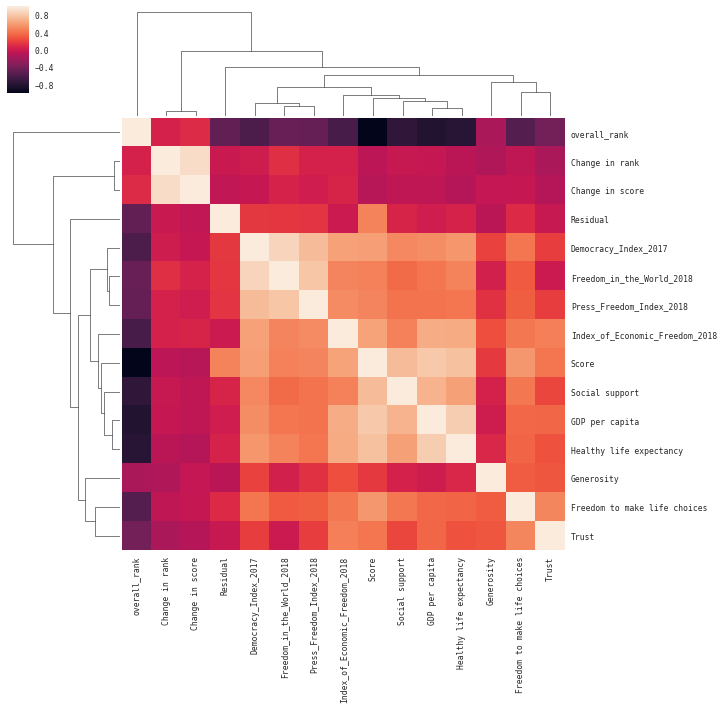

In [7]:
plot = sns.clustermap(df.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

Require an overall happiness index rank.

In [8]:
df = df[np.isfinite(df["overall_rank"])]

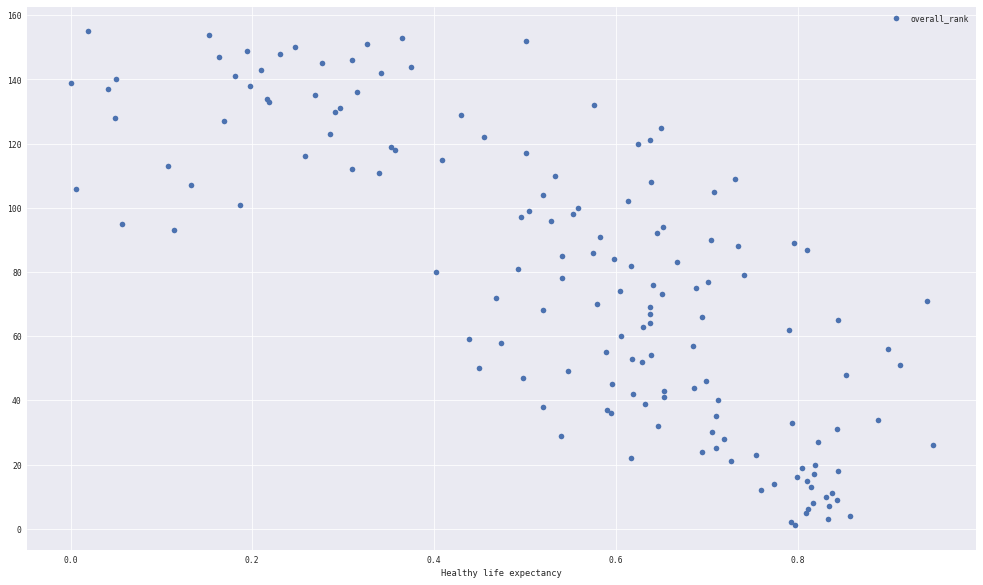

In [9]:
df.plot(x="Healthy life expectancy", y="overall_rank", style="o");

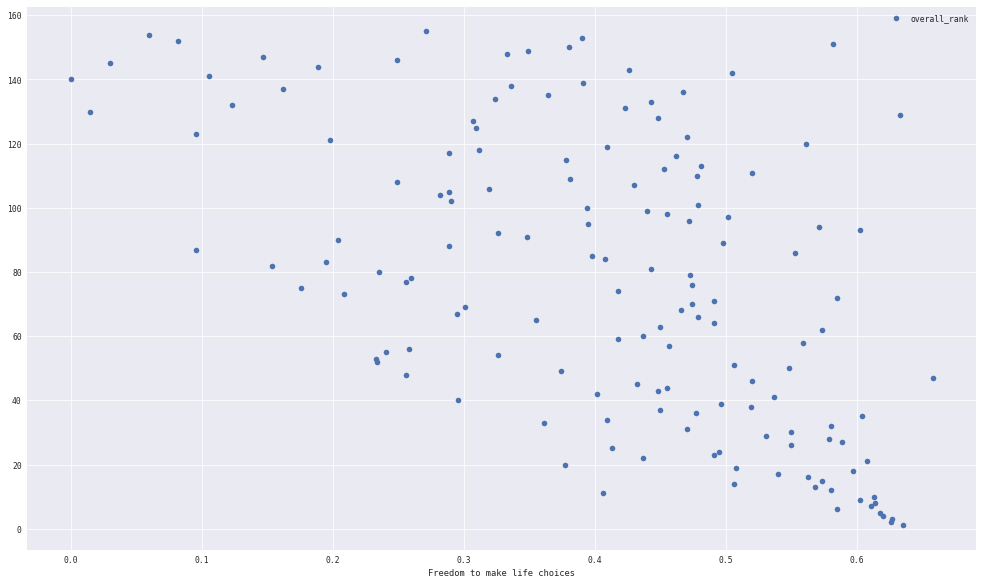

In [10]:
df.plot(x="Freedom to make life choices", y="overall_rank", style="o");

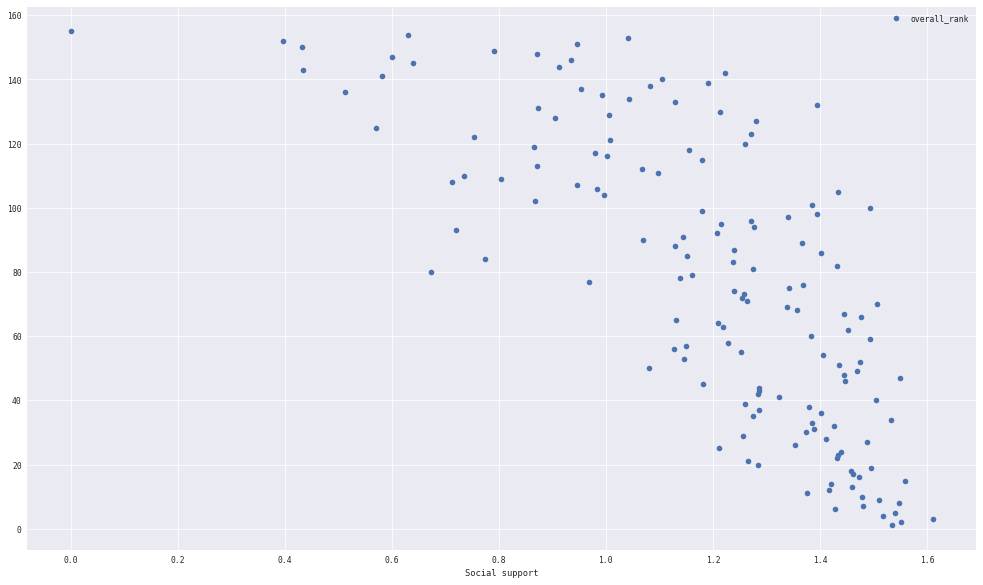

In [11]:
df.plot(x="Social support", y="overall_rank", style="o");

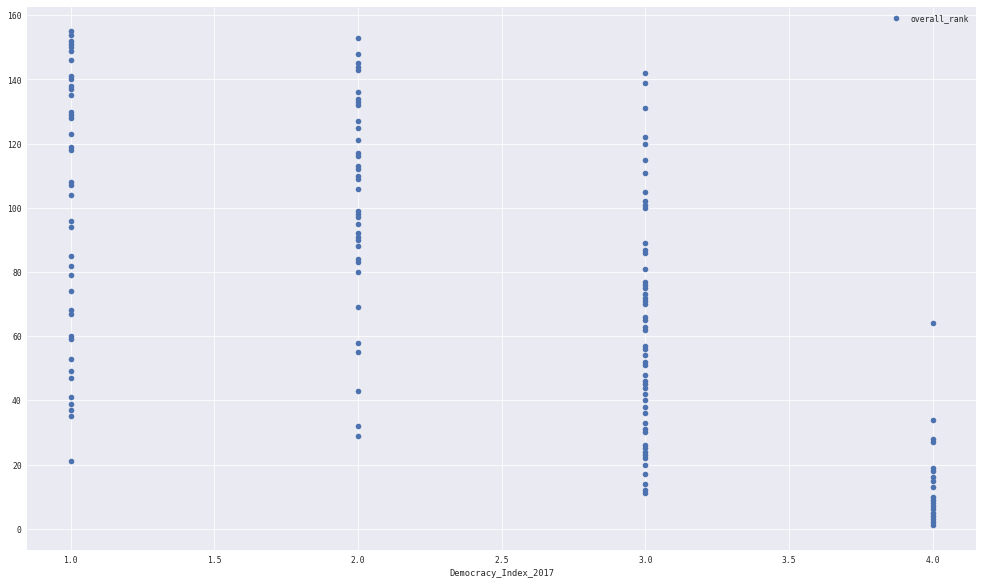

In [12]:
df.plot(x="Democracy_Index_2017", y="overall_rank", style="o");

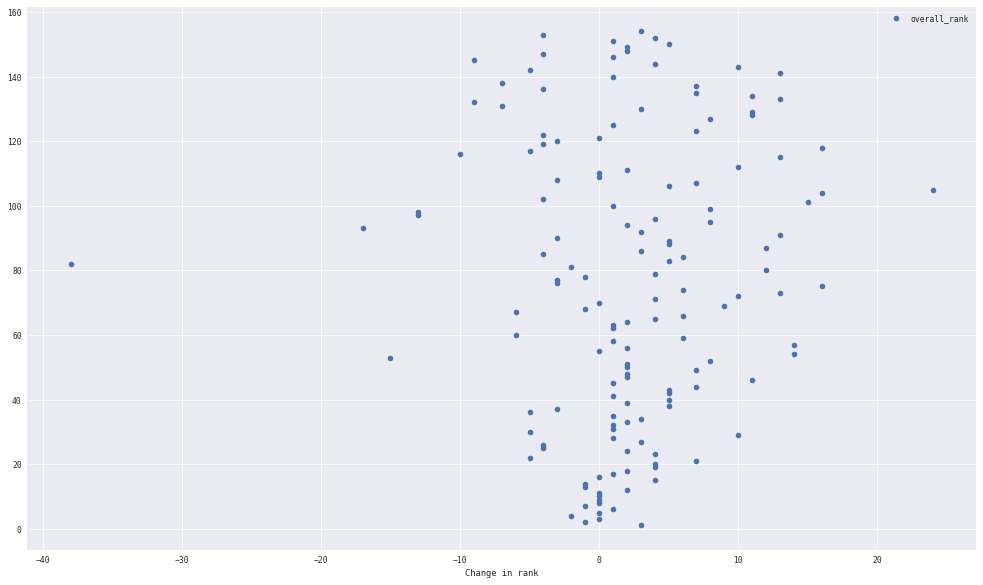

In [13]:
df.plot(x="Change in rank", y="overall_rank", style="o");

In [14]:
df = df.query("overall_rank <= 20")
del df["Freedom_in_the_World_2018"] # all values identical
df.sort_values("overall_rank") # sort by happiness index rank

,country,Index_of_Economic_Freedom_2018,Press_Freedom_Index_2018,Democracy_Index_2017,overall_rank,Change in rank,Score,Change in score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Trust,Residual
101,Norway,4.0,5.0,4.0,1,3.0,7.537,0.039,1.616,1.534,0.797,0.635,0.362,0.316,2.277
35,Denmark,4.0,5.0,4.0,2,-1.0,7.522,-0.004,1.482,1.551,0.793,0.626,0.355,0.401,2.314
55,Iceland,4.0,5.0,4.0,3,0.0,7.504,0.003,1.481,1.611,0.834,0.627,0.476,0.154,2.323
127,Switzerland,5.0,5.0,4.0,4,-2.0,7.494,-0.015,1.565,1.517,0.858,0.620,0.291,0.367,2.277
42,Finland,4.0,5.0,4.0,5,0.0,7.469,0.056,1.444,1.540,0.809,0.618,0.245,0.383,2.430
96,Netherlands,4.0,5.0,4.0,6,1.0,7.377,0.038,1.504,1.429,0.811,0.585,0.470,0.283,2.295
25,Canada,4.0,4.0,4.0,7,-1.0,7.316,-0.088,1.479,1.481,0.835,0.611,0.436,0.287,2.187
97,New Zealand,5.0,5.0,4.0,8,0.0,7.314,-0.020,1.406,1.548,0.817,0.614,0.500,0.383,2.046
6,Australia,5.0,4.0,4.0,9,0.0,7.284,-0.029,1.484,1.510,0.844,0.602,0.478,0.301,2.065
126,Sweden,4.0,5.0,4.0,10,0.0,7.284,-0.007,1.494,1.478,0.831,0.613,0.385,0.384,2.098


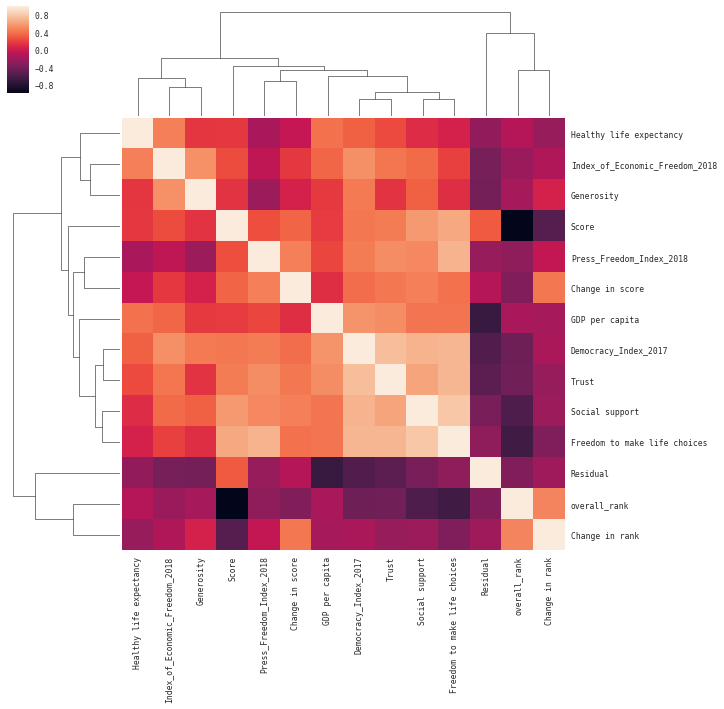

In [15]:
plot = sns.clustermap(df.corr())
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation = 0)

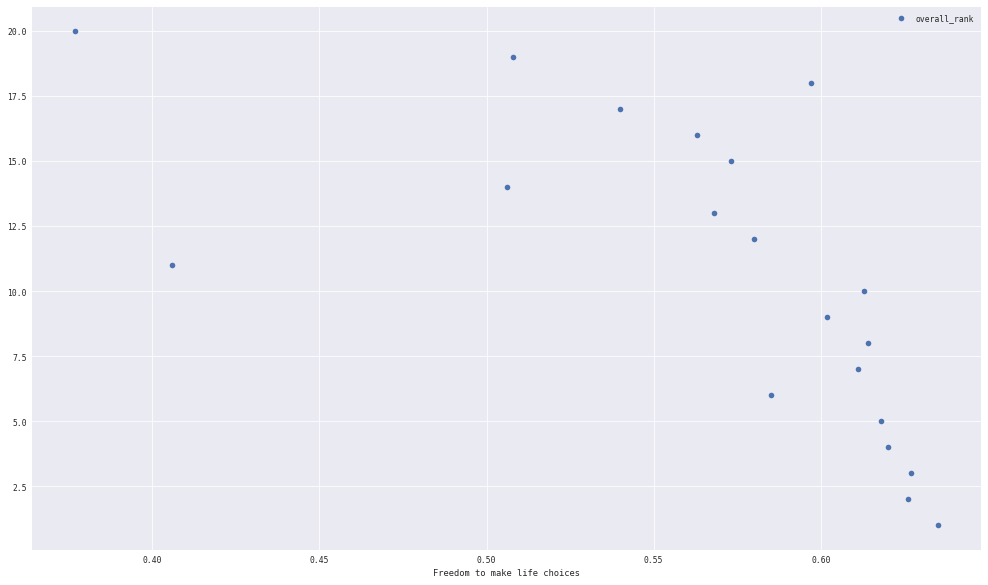

In [16]:
df.plot(x="Freedom to make life choices", y="overall_rank", style="o");

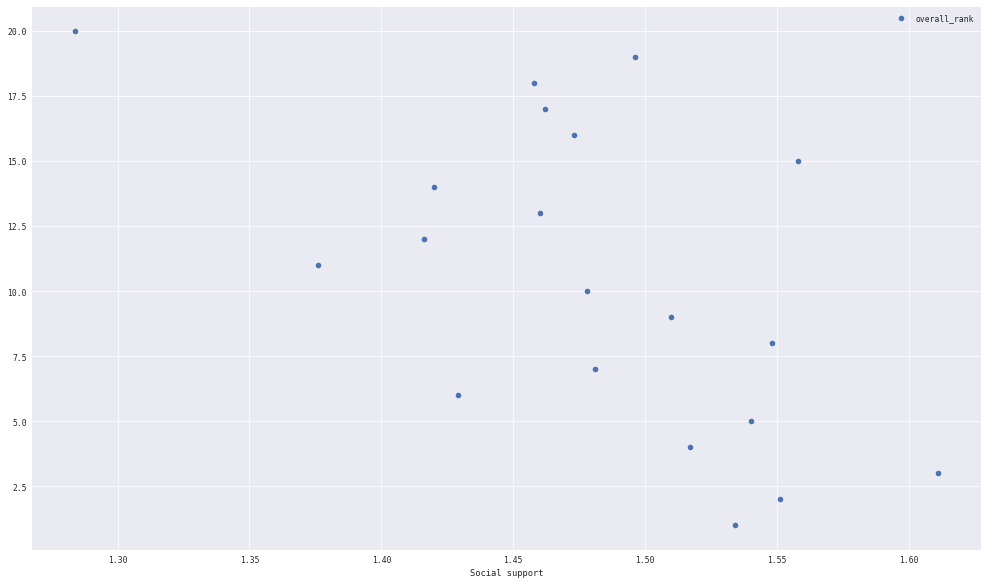

In [17]:
df.plot(x="Social support", y="overall_rank", style="o");

# observations

"Healthy life expectancy", "Freedom to make life choices", "Social support" and "Freedom in the World 2018" all are related to high happiness index score. In addition, the top 20 countries with high happiness index score all uniformly have a high index for "Freedom in the World 2018".